# Dog Recognition Group Task
---

###Javier Jiménez

###Álvaro Tomás

---

#Contexto

---

El objetivo es crear un modelo que permita reconocer a los perros y que pueda predecir correctamente la imagen de uno. Esto podemos aplicarlo empezando un modelo desde cero y un modelo preexistente y que entrene con nuevas imágenes.

El trabajo explicará el modelo o modelos que se utilizan (reconocimiento de imágenes) y las diferentes partes del código utilizadas.

Para este proyecto cargaremos 500 fotos de perros y 500 fotos de habitaciones, y nuestro modelo sera capaz de identificar en que foto hay un perro y en cuales no, hablamos de reconocer imagenes, este proceso de creación del modelo podría aplicarse a diferenciar animales entre ellos, animales entre por ejemplo humanos, o diferentes objetos entre sí. Simplemente habria que cambiar las muestras de imagenes que tenemos por las otras que quisieramos entrenar.



#Ajustes
---

Necesitaremos un conjunto de datos para la clasificación y también muchas imá
genes de animales como nuestras muestras.

---

In [0]:
from google.colab import files

!pip install google_images_download

Instalamos chromedriver y Selenium que serán clave a la hora de poder descar muchas imágenes a partir del buscador de Google

In [0]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.webite-url.com")

Get:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic/main amd64 Packages [36.8 kB]
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


Descargamos muchísimas imagenes, aunque solo usaremos 500 para nuestros diferentes Sets, ¿Por qué 800 muestras entonces? Debido a que muchas de ellas nos darán error por formato y con solo 500 de cada una de alguna de ellas fallará y no serán suficientes. Gracias a Selenium y chromedriver podremos descargar más de 100 imágenes, hasta el límite que queramos de otra manera solo serían 100 como máximo y no sería suficiente.


In [0]:
from google_images_download import google_images_download
response = google_images_download.googleimagesdownload()
arguments = {"keywords":"Room, Dog","limit":800,"print_urls":False, "chromedriver":"/usr/bin/chromedriver"}
paths = response.download(arguments)
print(paths)


Item no.: 1 --> Item name = Room
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.151392308.jpg
Completed Image ====> 2.hqdefault.jpg
Completed Image ====> 3.superior-queen-room---teaser.jpg
Completed Image ====> 4.Kaamos-Johan-Broberg.jpg
URLError on an image...trying next one... Error: <urlopen error timed out>
Completed Image ====> 5.241809_5_master.jpg
Completed Image ====> 6.Hilton_Panama_Alienware_Room_Gaming_hotel_room_12.jpg
Completed Image ====> 7.executive-terrace_03.jpg
Completed Image ====> 8.Hollywood-Hotel-Standard-Deluxe-Room-1-King-Bed-5a5634e85e465.jpg
Completed Image ====> 9.Serafina-Beach-Hotel-how-to-get-a-room-at-a-sold-out-hotel-800x450.jpg
Completed Image ====> 10.studio-crop.jpg
Completed Image ====> 11.c56665d66b83d270d2245130d2c92f1a3.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 12.the-bell-guest-room-double-baja.jpg
Completed Image ====> 13.44

Ahora deberiamos tener aproximadamente en nuestra carpeta de descargas 800 imágenes de perros que queríamos y otros 800 sin ellas. En este caso, vamos a comparar imagenes con perros y sin perros.


Queremos que se descargue a nuestra PC, para no repetir el proceso una y otra vez cada vez. (Subiremos la carpeta de imágenes a GitHub).

In [0]:
!zip -r /content/file.zip /content/downloads
files.download("/downloads/file.zip")

  adding: content/downloads/Room/ (stored 0%)
  adding: content/downloads/Room/1.151392308.jpg (deflated 2%)
  adding: content/downloads/Room/647.lobby.jpg (deflated 1%)
  adding: content/downloads/Room/496.54ff8221a5ed1-gb-living-rooms-blank-art-de.jpeg (deflated 1%)
  adding: content/downloads/Room/129.slideFamlilla1-934x475.jpg (deflated 1%)
  adding: content/downloads/Room/328.Esplanade-Zagreb-Hotel-Superior-Room-1_2048.jpg (deflated 0%)
  adding: content/downloads/Room/237.edyta-and-co-living-room-1549663130.jpg (deflated 2%)
  adding: content/downloads/Room/396.living-room-1569598480.jpg (deflated 1%)
  adding: content/downloads/Room/142.120treatment.promo_.jpg (deflated 0%)
  adding: content/downloads/Room/185.imperial-hotel-standard-double-3.jpg (deflated 1%)
  adding: content/downloads/Room/615.the-photos-room-0.jpg (deflated 1%)
  adding: content/downloads/Room/137.elevator.jpg (deflated 0%)
  adding: content/downloads/Room/178.1a.jpg (deflated 3%)
  adding: content/downloads

FileNotFoundError: ignored

Ya tenemos los archivos descargados. Ahora cambiamos sus nombres con un pequeño script en C# para poder recorrerlos de mejor forma (Dog_1.jpg, Room_1.jpg...), los metemosen una carpeta y lo zippeamos. Entonces, lo subimos a Drive ya que Github no permite subidas de archivos de más de 100mb y a DropBox, para que nos proporcione un link de descarga directa que podamos utilizar para cargar las imagenes. Igualmente dejaremos el link de Google Drive (https://drive.google.com/uc?export=download&id=15dnnl5nrIanzkisJvIFwaM_7pEsQJ1NN) para descargar que siempre será accesible, pero para la implementacion en Python necesitamos el link de DropBox.

---


##Inicializacion
---

Ahora necesitamos subir a Colab nuestras muestras ya ordenadas y comprimidas. Para ello, utilizaremos TensorFlow y otras librerias para tener todo preparado.

In [1]:
import tensorflow as tf
import os
import numpy as np

# Link de descarga directa (solo para la implementacion).
link = 'https://dl.dropboxusercontent.com/s/ngb49v0euaz6fgl/dogs_rooms.zip'

zip_path = tf.keras.utils.get_file('dogs_rooms.zip', origin=link, extract=True)
print(zip_path)
PATH = os.path.join(os.path.dirname(zip_path), 'dogs_rooms')
print(PATH)

350633984/350628364 [==============================] - 11s 0us/step
/root/.keras/datasets/dogs_rooms.zip
/root/.keras/datasets/dogs_rooms


Ya tenemos nuestro dataset de imagenes descargado, ahora vamos a comprobar que están alojadas correctamente.

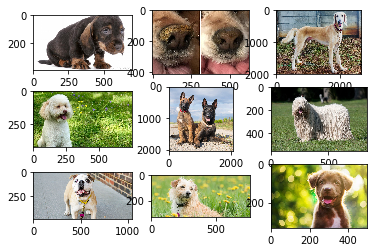

In [2]:
# Vamos a plottear unas imagenes de muestra del entrenamiento para ver que tenemos acceso a nuestras imagenes.
from matplotlib import pyplot
from matplotlib.image import imread

# Localizacion de nuestro set de imagenes
folder = PATH + "/";

# Mostramos 9 imagenes de perros.
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	filename = folder + 'Dog_' + str(i+1) + '.jpg'
	image = imread(filename)	
	pyplot.imshow(image)

pyplot.show()

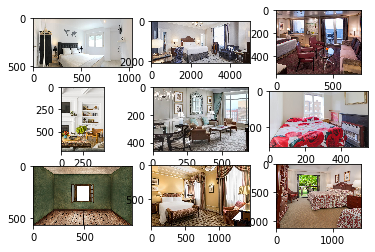

In [3]:
# Realizamos el mismo proceso para las imagenes que no son perros (habitaciones).
from matplotlib import pyplot
from matplotlib.image import imread

# Localizacion de nuestro set de imagenes
folder = PATH + "/";

# Mostramos 9 imagenes de habitaciones.
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	filename = folder + 'Room_' + str(i+1) + '.jpg'
	image = imread(filename)	
	pyplot.imshow(image)

pyplot.show()

## Preprocesado de Imagenes y redimension
---

Para que la creacion del modelo sea más óptima deberiamos tener todas las imagenes de nuestro modelo con un tamaño adecuado. En este caso, querriamos hacerlas a un tamaño de 200x200, suficiente para el reconocimiento y así aligeramos la carga en la RAM. Las guardaremos en un array de NumPy junto a sus respectivas clases.

In [4]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# Carpeta contenedora de nuestras imagenes
folder = PATH + "/";
photos, labels = list(), list()

for file in listdir(folder):
	# Determinamos la clase de nuestras fotos. Si es un perro, es 0.0 y si es la habitacion 1.0
	output = 0.0
	if file.startswith('Room'):
		output = 1.0

	# Cargamos la imagen
	photo = load_img(folder + file, target_size=(200, 200))
 
	# La convertimos a un array de NumPy y lo guardamos
	photo = img_to_array(photo)
	photos.append(photo)
	labels.append(output)
 
# Convertimos las listas a arrays de NumPy
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

# Guardamos en archivo
save('dogs_rooms_photos.npy', photos)
save('dogs_rooms_labels.npy', labels)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


(1000, 200, 200, 3) (1000,)


In [5]:
# Vamos a comprobar que los datos se guardaron correctamente

from numpy import load
photos = load('dogs_rooms_photos.npy')
labels = load('dogs_rooms_labels.npy')
print(photos.shape, labels.shape)

(1000, 200, 200, 3) (1000,)


## Crear directorios estandar para las imagenes
---

Vamos a querer ordenar nuestras imagenes en directorios para imagenes que sean utilizadas en el entrenamiento y otras para el test. Ya que disponemos de 500 muestras de cada tipo, podríamos utilizar 400 para el entrenamiento y 100 para el test. Lo haremos de forma aleatoria para que podamos ver que el modelo funciona pese a que la seleccion de imagenes sea distinta.

In [0]:
import os
# Creamos los directorios
dataset_home = PATH + '/dataset_dogs_rooms/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# Creamos los subdirectorios
	labeldirs = ['dogs/', 'rooms/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		os.makedirs(newdir, exist_ok=True)


Ahora vamos a dividir las muestras entre muestras de entrenamiento y muestras de testeo. La elección va a ser aleatoria pero debería coger unas 400 para training y 100 para testing.

In [0]:
import random
import os
import shutil 

#Valor randomizado.
random.seed(1)

# Ratio del total de muestras para el testing.
val_ratio = 0.25

# Copiamos las muestras a los directorios
src_directory = PATH + "/"
for file in listdir(src_directory):
  src = src_directory + file
  dst_dir = 'train/'
  if random.random() < val_ratio:
    dst_dir = 'test/'
  if file.startswith('Room'):
    dst = dataset_home + dst_dir + 'rooms/'  + file
    shutil.copyfile(src, dst)
  elif file.startswith('Dog'):
    dst = dataset_home + dst_dir + 'dogs/'  + file
    shutil.copyfile(src, dst)
  

Ya hemos copiado las muestras a nuestro nuevo directorio. Ahora vamos a realizar una comprobación para ver que las muestras se han copiado correctamente con el plotting de 9 imagenes, como hemos hecho en la primera parte.

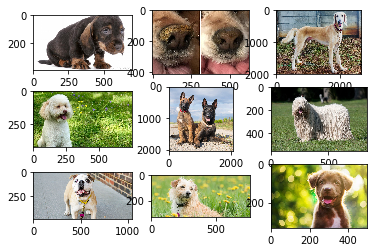

/root/.keras/datasets/dogs_rooms/dataset_dogs_rooms/train/dogs/


In [8]:
# Vamos a plottear unas imagenes de muestra del entrenamiento para ver que tenemos acceso a nuestras imagenes.
from matplotlib import pyplot
from matplotlib.image import imread

# Localizacion de nuestro set de imagenes
folder = dataset_home + "train/dogs/";

# Mostramos 9 imagenes de habitaciones.
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	filename = folder + 'Dog_' + str(i+1) + '.jpg'
	image = imread(filename)	
	pyplot.imshow(image)

pyplot.show()
print(folder)

##Crear un modelo base de Red Neuronal Convolucional
---

Nuestro modelo base va a establecer unos mínimos para que podamos comparar con otros modelos y ver cual hace mejor su trabajo.
Un buen comienzo puede ser seguir los principios de los modelos de VGG de la universidad de Oxford.

Este modelo agrupa filtros de capas convolucionales de 3x3 con una capa de agrupacion máxima. Juntando estos filtros obtenemos bloques, los cuales podremos usar repetidamente para mejorar los filtros de nuestra red neuronal, y en cada bloque aumentar la profundidad de esta como de 32, 64, 128 para los 3 primeros bloques.


In [0]:
# Bloque 1
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

# Bloque 2
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Bloque 3
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))


Vamos a crear una funcion para poder definir el modelo de forma mas sencilla con una sola instrucción. Esta funcion creará un modelo para nuestra tarea de clasificacion de perros con un bloque del estilo del VGG. Para ello utilizaremos los 3 bloques para obtener mejores resultados. Entrenaremos nuestro modelo con los contenidos de nuestra carpeta train y test y luego plottearemos las curvas de aprendizaje de nuestro modelo. Dependiendo del Accuracy obtenido miraremos si tenemos que mejorarlo.

Vamos a hacer 5 epochs en nuestro entrenamiento en batches de 64 muestras. Tampoco podemos hacer muchas iteraciones por que si no tardaría demasiado en mostrar un resultado. (Hemos intentado con bastantes más y acababa demorandose a 1 hora de entrenamiento o más)

In [0]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
#Definimos el numero de epochs que vamos a utilizar. 
epoch_number = 5

# Definimos nuestro modelo de 3 bloques (32,64,128)
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# Compilamos el modelo
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# Funcion para plottear los resultados de los entrenamientos
def summarize_diagnostics(history):
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['acc'], color='blue', label='train')
	pyplot.plot(history.history['val_acc'], color='orange', label='test')
	# Guardamos en un archivo
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')

# Entrenamos nuestro modelo y mostramos las gráficas
def train_model():
	# Definimos el modelo
	model = define_model()
	# Usamos un ImageDataGenerator de Keras
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# Preparamos los iteradores
	train_it = datagen.flow_from_directory(dataset_home+'train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory(dataset_home+'test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# Fitteamos nuestro modelo
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=epoch_number, verbose=1)
	# Evaluamos
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))
	# Mostramos las curvas de aprendizaje
	summarize_diagnostics(history)

Found 773 images belonging to 2 classes.
Found 227 images belonging to 2 classes.
Epoch 1/5
 1/13 [=>............................] - ETA: 3:10 - loss: 0.7914 - acc: 0.4531

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/13 [==============================] - 92s 7s/step - loss: 1.7140 - acc: 0.4952 - val_loss: 0.6886 - val_acc: 0.5198
Epoch 2/5
13/13 [==============================] - 87s 7s/step - loss: 0.6728 - acc: 0.5700 - val_loss: 0.6937 - val_acc: 0.4846
Epoch 3/5
13/13 [==============================] - 86s 7s/step - loss: 0.5971 - acc: 0.6740 - val_loss: 0.6209 - val_acc: 0.5771
Epoch 4/5
13/13 [==============================] - 87s 7s/step - loss: 0.5616 - acc: 0.6996 - val_loss: 0.5744 - val_acc: 0.6828
Epoch 5/5
4/4 [==============================] - 13s 3s/step
> 78.855


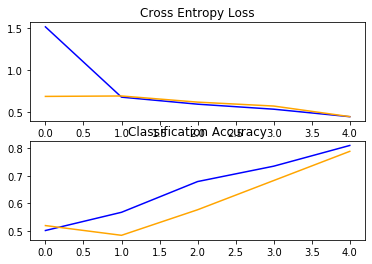

In [0]:
#Ejecutamos el entrenamiento
train_model()

Con nuestro modelo actual hemos obtenido una accuracy de 78,85. Podemos intentar mejorarlo utilizando otras herramientas o tecnicas para que el modelo sea mucho mejor.

###Dropout
---

Podemos probar a implementar nuestro modelo con la tecnica del Dropout, utilizada por Google para reducir el sobreajuste en sus redes neuronales. Se basa en eliminar de forma probabilistica inputs que se meten en las capas haciendo así los nodos de la red neuronal más robustos.

In [0]:
from keras.layers import Dropout

# Añadimos un 20% de Dropout entre bloque y bloque.
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	# Compilamos el modelo
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

Found 773 images belonging to 2 classes.
Found 227 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/13 [==============================] - 98s 8s/step - loss: 5.6418 - acc: 0.5036 - val_loss: 0.6971 - val_acc: 0.4846
Epoch 2/10
13/13 [==============================] - 91s 7s/step - loss: 0.7005 - acc: 0.5095 - val_loss: 0.6941 - val_acc: 0.5066
Epoch 3/10
13/13 [==============================] - 91s 7s/step - loss: 0.6869 - acc: 0.5314 - val_loss: 0.6862 - val_acc: 0.6123
Epoch 4/10
13/13 [==============================] - 91s 7s/step - loss: 0.6587 - acc: 0.5918 - val_loss: 0.6655 - val_acc: 0.6388
Epoch 5/10
13/13 [==============================] - 91s 7s/step - loss: 0.6127 - acc: 0.6691 - val_loss: 0.6313 - val_acc: 0.7621
Epoch 6/10
13/13 [==============================] - 92s 7s/step - loss: 0.5678 - acc: 0.6862 - val_loss: 0.5996 - val_acc: 0.7137
Epoch 7/10
13/13 [==============================] - 91s 7s/step - loss: 0.5395 - acc: 0.7344 - val_loss: 0.5727 - val_acc: 0.7665
Epoch 8/10
13/13 [==============================] - 92s 7s/step - loss: 0.5066 - acc: 0.7681 - val_lo

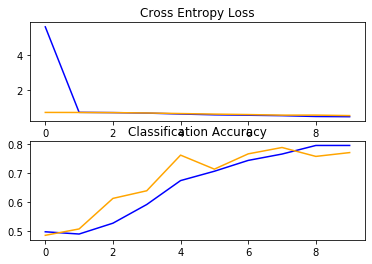

In [0]:
# Cambiamos el numero de epochs para ver que tal funciona
epoch_number = 10

# Ejecutamos el entrenamiento
train_model()

Vemos que el accuracy obtenido tampoco difiere mucho del que tenemos actualmente así que vamos a intentar hacer cambios para que mejore.


###Image Data Augmentation
---
Encontramos que hay otro método de Image Data Augmentation, que nos permite aumentar el dataset del que disponemos haciendo modificaciones en las imágenes y asi tener una muestra muchisimo mas grande de la que teniamos originalmente
. 

In [0]:
# Cambiamos la definicion del modelo
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

def train_model():
	# Definimos el modelo
	model = define_model()
	# Usamos dos ImageDataGenerators de Keras
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# Preparamos los iteradores
	train_it = train_datagen.flow_from_directory(dataset_home+'train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = test_datagen.flow_from_directory(dataset_home+'test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# Fitteamos nuestro modelo
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=epoch_number, verbose=1)
	# Evaluamos
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))
	# Mostramos las curvas de aprendizaje
	summarize_diagnostics(history)

Found 773 images belonging to 2 classes.
Found 227 images belonging to 2 classes.
Epoch 1/5
 2/13 [===>..........................] - ETA: 1:21 - loss: 1.9139 - acc: 0.6188

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/13 [==============================] - 99s 8s/step - loss: 1.0859 - acc: 0.5627 - val_loss: 0.6846 - val_acc: 0.4978
Epoch 2/5
13/13 [==============================] - 93s 7s/step - loss: 0.6390 - acc: 0.6135 - val_loss: 0.5797 - val_acc: 0.6828
Epoch 3/5
13/13 [==============================] - 93s 7s/step - loss: 0.5639 - acc: 0.7090 - val_loss: 0.5358 - val_acc: 0.7445
Epoch 4/5
13/13 [==============================] - 93s 7s/step - loss: 0.5256 - acc: 0.7524 - val_loss: 0.4620 - val_acc: 0.7930
Epoch 5/5
4/4 [==============================] - 14s 3s/step
> 64.758


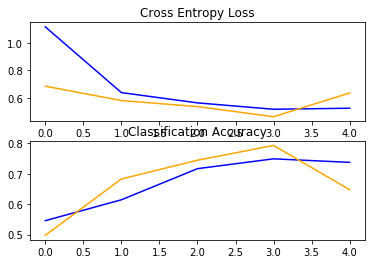

In [0]:
# Cambiamos el numero de epochs para ver que tal funciona
epoch_number = 5

# Ejecutamos el entrenamiento
train_model()

Found 773 images belonging to 2 classes.
Found 227 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/13 [==============================] - 98s 8s/step - loss: 0.9398 - acc: 0.5652 - val_loss: 0.6502 - val_acc: 0.7401
Epoch 2/10
13/13 [==============================] - 93s 7s/step - loss: 0.6234 - acc: 0.7294 - val_loss: 0.5777 - val_acc: 0.7489
Epoch 3/10
13/13 [==============================] - 92s 7s/step - loss: 0.5464 - acc: 0.7583 - val_loss: 0.5225 - val_acc: 0.7445
Epoch 4/10
13/13 [==============================] - 92s 7s/step - loss: 0.5333 - acc: 0.7355 - val_loss: 0.4929 - val_acc: 0.7665
Epoch 5/10
13/13 [==============================] - 92s 7s/step - loss: 0.4552 - acc: 0.8018 - val_loss: 0.4812 - val_acc: 0.7930
Epoch 6/10
13/13 [==============================] - 93s 7s/step - loss: 0.4883 - acc: 0.7693 - val_loss: 0.4539 - val_acc: 0.7797
Epoch 7/10
13/13 [==============================] - 92s 7s/step - loss: 0.4461 - acc: 0.7994 - val_loss: 0.4253 - val_acc: 0.8150
Epoch 8/10
13/13 [==============================] - 92s 7s/step - loss: 0.4587 - acc: 0.7814 - val_lo

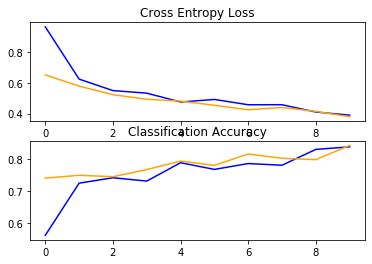

In [35]:
# Vamos a volver a realizar el entrenamiento con mas iteraciones ya que hemos obtenido una accuracy demasiado baja en el ultimo entrenamiento.
epoch_number = 10

# Ejecutamos el entrenamiento
train_model()

Como podemos observar, con 10 repeticiones el modelo se ajusta mucho mejor y responde con una accuracy mayor de 84.14. Si lo pusiesemos a entrenar más seguramente obtendriamos mejores resultados pero ya hemos visto que es una mejoría.

###Transfer Learning
---
Por ultimo vamos a utilizar un modelo pre-entrenado utilizando el Transfer Learning. Keras dispone de varios modelos pre-entrenados pero nosotros tomaremos uno como base de pre-entreno para entrenarlo con nuestro dataset y asi obtener un modelo mucho más óptimo.

Uno de los modelos más eficiente es de los que pertenecen a los modelos VGG, como el VGG-16 que utilizaba 16 capas en el momento que fue desarrollado y que obtuvo uno de los scores mas altos en una competición de clasificacion de fotos por ImageNet.

El modelo se divide en dos partes: La parte que extracción de features esta constituida por modelos de VGG y el clasificador que está lleno de capas conectadas entre si y la capa de output.

Con este modelo podemos quedarnos con la parte de extraccion de features ya que será de lo mejor que haya para nuestro caso y quedarnos con la clasificacion que hemos creado para nuestro problema de identificacion.

Eliminaremos las capas de output del modelo VGG-16 para añadir nuevas capas con nuestro output y poder hacer nuestra predicción. La parte de clasificacion se puede deshabilitar simplemente con un bucle que hara que las capas preestablecidas no sean entrenables, lo que tambien requiere una forma concreta de los inputs, en este caso (224,224,3).



In [0]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

def define_model():
	# Cargamos el modelos
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# Deshabilitamos los layers que nos ha cargado
	for layer in model.layers:
		layer.trainable = False
	# Añadimos los nuevos layers que tenemos
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# Definimos el modelo
	model = Model(inputs=model.inputs, outputs=output)
	# Compilamos el modelo
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

Como solamente tenemos que entrenar los nuevos layers que hemos añadido al modelo pre-existente, no necesitaremos demasiadas repeticiones para entrenarlo. El modelo de VGG-16 espera imagenes de 224x224 así que tendremos que usar esta resolución objetivo para nuestro dataset. Tambien espera que las imagenes esten centradas, teniendo la media de los valores de los pixeles en cada canal de color calculados previamente por ImageNet.

Podemos obtener esto activando el featurewise_center del ImageDataGenerator a verdadero, y especificando la media de valores de pixeles a mano, así que cogeremos la de ImageNet y utilizaremos esa para que funcione correctamente con el modelo.

In [0]:
def train_model():
	# Definimos el modelo
	model = define_model()
  # Creamos el Datagen con el featurewise_center activado
	datagen = ImageDataGenerator(featurewise_center=True)
	# Especificamos los valores de pixeles para el centrado
	datagen.mean = [123.68, 116.779, 103.939]
	# Preparamos los iteradores
	train_it = datagen.flow_from_directory(dataset_home+'train/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory(dataset_home+'test/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# Fitteamos nuestro modelo
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=epoch_number, verbose=1)
	# Evaluamos
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))
	# Mostramos las curvas de aprendizaje
	summarize_diagnostics(history)

Found 773 images belonging to 2 classes.
Found 227 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/13 [==============================] - 551s 42s/step - loss: 0.5549 - acc: 0.9492 - val_loss: 0.2453 - val_acc: 0.9780
Epoch 2/5
13/13 [==============================] - 525s 40s/step - loss: 0.0771 - acc: 0.9952 - val_loss: 0.2107 - val_acc: 0.9868
Epoch 3/5
13/13 [==============================] - 524s 40s/step - loss: 0.0556 - acc: 0.9964 - val_loss: 1.0931e-07 - val_acc: 1.0000
Epoch 4/5
13/13 [==============================] - 525s 40s/step - loss: 1.0931e-07 - acc: 1.0000 - val_loss: 1.0931e-07 - val_acc: 1.0000
Epoch 5/5
4/4 [==============================] - 126s 31s/step
> 100.000


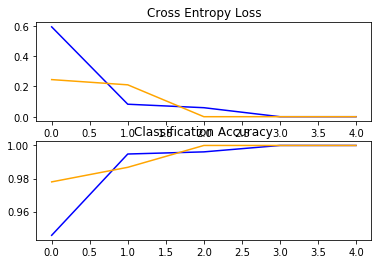

In [48]:
# Seteamos los epoch a un valor menor que antes
epoch_number = 5

# Ejecutamos el entrenamiento
train_model()

Con este modelo finalmente obtenemos un 100% de accuracy. Ahora deberiamos guardar el modelo para poder utilizarlo y comprobar con otras imagenes que descarguemos a parte de nuestras muestras.

#Preparacion del modelo final
---

Para tener un modelo final vamos a tener que separar nuestras muestras y tener labels o etiquetas únicamente en nuestras imagenes de training.

Vamos a hacer una carpeta que contenga dos carpetas, una para perros y otra para habitaciones, y moveremos ahi las imagenes.

In [0]:
from os import makedirs
from os import listdir
from shutil import copyfile
# Creamos el directorio
dataset_home = PATH + '/final_dogs_rooms/'
# Creamos los subdirectorios
labeldirs = ['dogs/', 'rooms/']
for labldir in labeldirs:
	newdir = dataset_home + labldir
	makedirs(newdir, exist_ok=True)
# Copiamos las imagenes del entrenamiento en su directorio correspondiente
src_directory = PATH
for file in listdir(src_directory):
	src = src_directory + '/' + file
	if file.startswith('Room'):
		dst = dataset_home + 'rooms/'  + file
		copyfile(src, dst)
	elif file.startswith('Dog'):
		dst = dataset_home + 'dogs/'  + file
		copyfile(src, dst)

Ahora que ya tenemos las imagenes organizadas en diferentes carpetas, vamos a entrenar y guardar nuestro modelo. 

In [0]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator


def define_model():
	# Cargamos el modelo
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# Deshabilitamos los layers que nos ha cargado
	for layer in model.layers:
		layer.trainable = False
	# Añadimos los nuevos layers que tenemos
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# Definimos el modelo
	model = Model(inputs=model.inputs, outputs=output)
	# Compilamos el modelo
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model


def train_model():
	# Definimos el modelo
	model = define_model()
  # Creamos el Datagen con el featurewise_center activado
	datagen = ImageDataGenerator(featurewise_center=True)
	# Especificamos los valores de pixeles para el centrado
	datagen.mean = [123.68, 116.779, 103.939]
	# Preparamos los iteradores
	train_it = datagen.flow_from_directory(dataset_home,
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# Fitteamos nuestro modelo
	model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=epoch_number, verbose=1)
	# Guardamos nuestro modelo en un archivo
	model.save('/content/final_model.h5')


In [13]:
#Usamos las mismas que antes ya que estamos usando el mismo modelo
epoch_number = 5

train_model()





58892288/58889256 [==============================] - 1s 0us/step








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Found 1000 images belonging to 2 classes.


Epoch 1/5


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


16/16 [==============================] - 556s 35s/step - loss: 0.3714 - acc: 0.9599
Epoch 2/5
16/16 [==============================] - 535s 33s/step - loss: 0.0315 - acc: 0.9980
Epoch 3/5
16/16 [==============================] - 534s 33s/step - loss: 0.0315 - acc: 0.9980
Epoch 4/5
16/16 [==============================] - 532s 33s/step - loss: 0.0315 - acc: 0.9980
Epoch 5/5
16/16 [==============================] - 536s 34s/step - loss: 0.0315 - acc: 0.9980


In [0]:
# Descargamos nuestro modelo para utilizarlo sin tener que rehacer el proceso.
from google.colab import files
files.download("/content/final_model.h5")

#Predicción
---

Ya tenemos nuestro modelo. Ahora solo queda probarlo con predicciones de fotos que podamos utilizar. Vamos a coger una foto de internet y vamos a ver si el modelo funciona correctamente.

Usaremos la foto de un perro para ver si lo detecta correctamente. Esperamos que el resultado sea 0.0 para perro y 1.0 para habitaciones.

Vamos a necesitar una pequeña funcion para cargar imagenes y ajustarlas al modelo.

In [0]:
def load_image(filename):
	# Cargamos la imagen
	img = load_img(filename, target_size=(224, 224))
	# Convertimos a array
	img = img_to_array(img)
	# Transformamos la imagen
	img = img.reshape(1, 224, 224, 3)
	# La centramos con el valor de los pixeles adecuado
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

#Hemos cargado una imagen de una maquina de coser (subida en GitHub).
img_path = '/content/máquina-de-coser-botones-industrial-brother.png'

# Funcion para predecir
def predict():
	# Cargamos la imagen (reemplazamos la ruta por la imagen que acabamos de subir)
	img = load_image(img_path)
	# Cargamos el modelo
	model = load_model('/content/final_model.h5')
	# Hacemos la prediccion
	result = model.predict(img)
	print(result[0])

In [82]:
predict()

[1.]


Vemos que obtenemos un 1, el cual pertenece a las habitaciones. Ahora probamos con una imagen de un perro.

In [83]:
img_path = '/content/cute-puppy-body-image.jpg'
predict()

[0.]


#Conclusión
---

Como podemos ver, nuestro modelo predice correctamente imagenes en las que hay perros e imagenes de habitaciones sin ellos. Si quisieramos hacer que la diferencia entre "cosas que no son perros" y perros fuese mucho mayor, tendriamos que tener una cantidad de samples muchísimo más grande y de cosas más genéricas, pero por cuestión de la organización del dataset no ha sido posible, ya que encontrar una gran cantidad de imagenes que no correspondan al tema, mezclarlas, filtrar las que no sean útiles y demás, es una gran carga.

Con esta práctica hemos aprendido como funciona por encima el reconocimiento de imágenes ya que en profundidad es muy complejo. Ya teníamos algunos conocimientos de como se aplicaban las redes neuronales que vimos en clase y con la práctica hemos podido entender mejor cómo funciona el tema de los layers y los inputos. Tambien hemos visto que el obtener un dataset desde cero y tenerlo disponible para usar en Google Colab no es facil.

Hemos tenido que descargar varias veces las imagenes usando la API de Google y unas cuantas de más por que a veces daba error al descargarlas. Luego para obtener una muestra bien ordenada hemos tenido que descargarlas en uno de nuestros ordenadores, crear un pequeño script de C# para renombrar cada una de las imágenes y luego subirlas a algun servidor que permitiese links de descarga directa. Tuvimos que usar DropBox ya que Drive no nos dejaba crear uno sin que apareciese una preview y Github no nos permitia subir archivos de mas de 100mb.

Tambien a la hora de entrenar, algunos modelos nos han tardado muchísimo en entrenar y el tiempo que tardaba en realizar un entrenamiento era ridículo (algunos llegaron a tardar 3 horas para a penas cambiar el resultado) por lo que hemos tenido que acabar reduciendo muchísimo el número de epochs pese a costa de perder un poco de precisión.



#Bibliografía
---

* https://medium.com/@swapp19902/image-classifier-using-fastai-and-google-colab-87dfc4e90e63
* https://www.kaggle.com/alessiocorrado99/animals10
* https://www.youtube.com/watch?v=kwcillcWOg0
* https://www.robots.ox.ac.uk/~vgg/
* https://keras.io/preprocessing/image/
* https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/
* https://neurohive.io/en/popular-networks/vgg16/